In [1]:
%cd ..

/pub/hofmann-scratch/glanzillo/ded


In [2]:

import importlib
import json
import math
import os
import socket
import sys
import time


internal_path = os.path.abspath(os.path.join('.'))
sys.path.append(internal_path)
sys.path.append(internal_path + '/datasets')
sys.path.append(internal_path + '/utils')

import datetime
import uuid
from argparse import ArgumentParser

import setproctitle
import torch
import numpy as np
import pandas as pd 
import json


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.collections import LineCollection



In [3]:
%ls

__init__.py  dataset_utils/     log.txt  logs.txt          scripts/  wandb/
data/        languini-kitchen/  logs/    requirements.txt  utils/


In [4]:
logs_path = './logs/results/cifar100/resnet18/logs_v2.txt'
results = []
with open(logs_path) as f:
    while line := f.readline():
        results.append(json.loads(line))

In [5]:
res_df = pd.DataFrame(results)
res_df

/local/home/glanzillo/.local/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/local/home/glanzillo/.local/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,distributed,lr,checkpoints,checkpoints_stud,pretrained,optim_wd,optim_adam,optim_mom,optim_warmup,optim_nesterov,...,final_train_acc_S,final_cka_train,final_cka_val,network,final_val_acc_S,final_train_agreement,final_val_agreement,final_val_function_distance,final_distance_teacher_student,label_smoothing
0,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,5.547696e-01,2.847967e-01,resnet18,16.06,100.000000,16.43,0.770637,79.872841,NaN
1,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,7.432768e-01,3.219555e-01,resnet18,19.41,100.000000,19.72,0.739756,71.760742,NaN
2,no,0.1,True,True,False,0.0001,False,0,5,False,...,99.916667,2.696970e-01,2.269158e-01,resnet18,12.62,99.916667,12.65,0.817719,60.333302,NaN
3,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,3.240899e-01,2.424814e-01,resnet18,13.51,100.000000,13.68,0.828227,69.924026,NaN
4,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,8.790157e-01,4.006754e-01,resnet18,25.12,100.000000,25.83,0.684991,63.894932,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,no,0.1,True,False,False,0.0001,False,0,5,False,...,1.022917,2.270273e-07,-1.791177e-07,resnet18,1.00,1.022917,0.89,0.833153,42.164310,True
457,no,0.1,True,False,False,0.0001,False,0,5,False,...,99.991667,7.126797e-01,6.655650e-01,resnet18,74.42,99.991667,78.08,0.355894,48.897594,True
458,no,0.1,True,False,False,0.0001,False,0,5,False,...,41.141667,4.950044e-01,5.192927e-01,resnet18,37.87,41.141667,38.71,0.821872,41.681454,True
459,no,0.1,True,False,False,0.0001,False,0,5,False,...,99.991667,7.279749e-01,6.852198e-01,resnet18,73.89,99.991667,78.04,0.280031,51.492168,True


In [15]:
logs_path = './logs/results/cifar100/resnet18/logs_v2.txt'
results = []
with open(logs_path) as f:
    while line := f.readline():
        results.append(json.loads(line))

In [16]:
res_df = pd.DataFrame(results)
res_df.head(5)

,distributed,lr,checkpoints,checkpoints_stud,pretrained,optim_wd,optim_adam,optim_mom,optim_warmup,optim_nesterov,...,final_train_acc_S,final_cka_train,final_cka_val,network,final_val_acc_S,final_train_agreement,final_val_agreement,final_val_function_distance,final_distance_teacher_student,label_smoothing
0,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.554770,0.284797,resnet18,16.06,100.000000,16.43,0.770637,79.872841,NaN
1,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.743277,0.321956,resnet18,19.41,100.000000,19.72,0.739756,71.760742,NaN
2,no,0.1,True,True,False,0.0001,False,0,5,False,...,99.916667,0.269697,0.226916,resnet18,12.62,99.916667,12.65,0.817719,60.333302,NaN
3,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.324090,0.242481,resnet18,13.51,100.000000,13.68,0.828227,69.924026,NaN
4,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.879016,0.400675,resnet18,25.12,100.000000,25.83,0.684991,63.894932,NaN


In [9]:
res_df['network'].unique()

array(['resnet18'], dtype=object)

In [17]:
res_df.columns

Index(['distributed', 'lr', 'checkpoints', 'checkpoints_stud', 'pretrained',
       'optim_wd', 'optim_adam', 'optim_mom', 'optim_warmup', 'optim_nesterov',
       'optim_cosineanneal', 'n_epochs', 'n_epochs_stud', 'batch_size',
       'validate_subset', 'temperature', 'fkd', 'lamdafr', 'gpus_id', 'seed',
       'notes', 'non_verbose', 'disable_log', 'validation',
       'ignore_other_metrics', 'debug_mode', 'test_mode', 'nowand',
       'wandb_entity', 'wandb_project', 'wandb_name', 'buffer_size',
       'minibatch_size', 'alpha', 'conditional_teacher', 'MSE',
       'distillation_type', 'K', 'N_BLOCKS', 'gamma', 'final_val_acc_D',
       'buffer_train_time', 'final_train_acc_S', 'final_cka_train',
       'final_cka_val', 'network', 'final_val_acc_S', 'final_train_agreement',
       'final_val_agreement', 'final_val_function_distance',
       'final_distance_teacher_student', 'label_smoothing'],
      dtype='object')

In [30]:
res_df['notes'].unique()

array(['cifar100-resnet18-distillation-v2',
       'cifar100-resnet18-distillation-labelsmoothing'], dtype=object)

In [18]:
buffer_sizes = sorted(list(res_df['buffer_size'].unique()))
buffer_sizes

[1200, 6000, 12000, 24000, 48000]

In [31]:

working_df = res_df.loc[res_df['notes']=="cifar100-resnet18-distillation-v2"]
#working_df_lbl = res_df.loc[res_df['alpha']==1]
#working_df = working_df.loc[working_df['checkpoints_stud'].isin([True, False]),:] # removing all the runs that didn't work 
#working_df,working_df_lbl
working_df['buffer_size_p'] = working_df['buffer_size']/50000
working_df['generalization_gap'] = working_df['final_val_acc_S']-working_df['final_train_acc_S']

working_df['T']= working_df['temperature'].astype('category')
working_df['data_size']= working_df['buffer_size'].astype('category')
working_df['buffer_size_p'] = working_df['buffer_size']/50000

/tmp/ipykernel_1764073/2075398400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['buffer_size_p'] = working_df['buffer_size']/50000
/tmp/ipykernel_1764073/2075398400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['generalization_gap'] = working_df['final_val_acc_S']-working_df['final_train_acc_S']
/tmp/ipykernel_1764073/2075398400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [21]:
teacher_val_accuracy = list(working_df['final_val_acc_D'])[0]
#teacher_train_accuracy = 77.50
teacher_val_accuracy

75.81

In [22]:
buffer_sizes_p = sorted(working_df['buffer_size_p'].unique())
buffer_sizes_p


[0.024, 0.12, 0.24, 0.48, 0.96]

In [23]:
temperatures = sorted(working_df['temperature'].unique())
temperatures

[0.1, 1.0, 3.0, 5.0, 10.0, 20.0, 100.0]

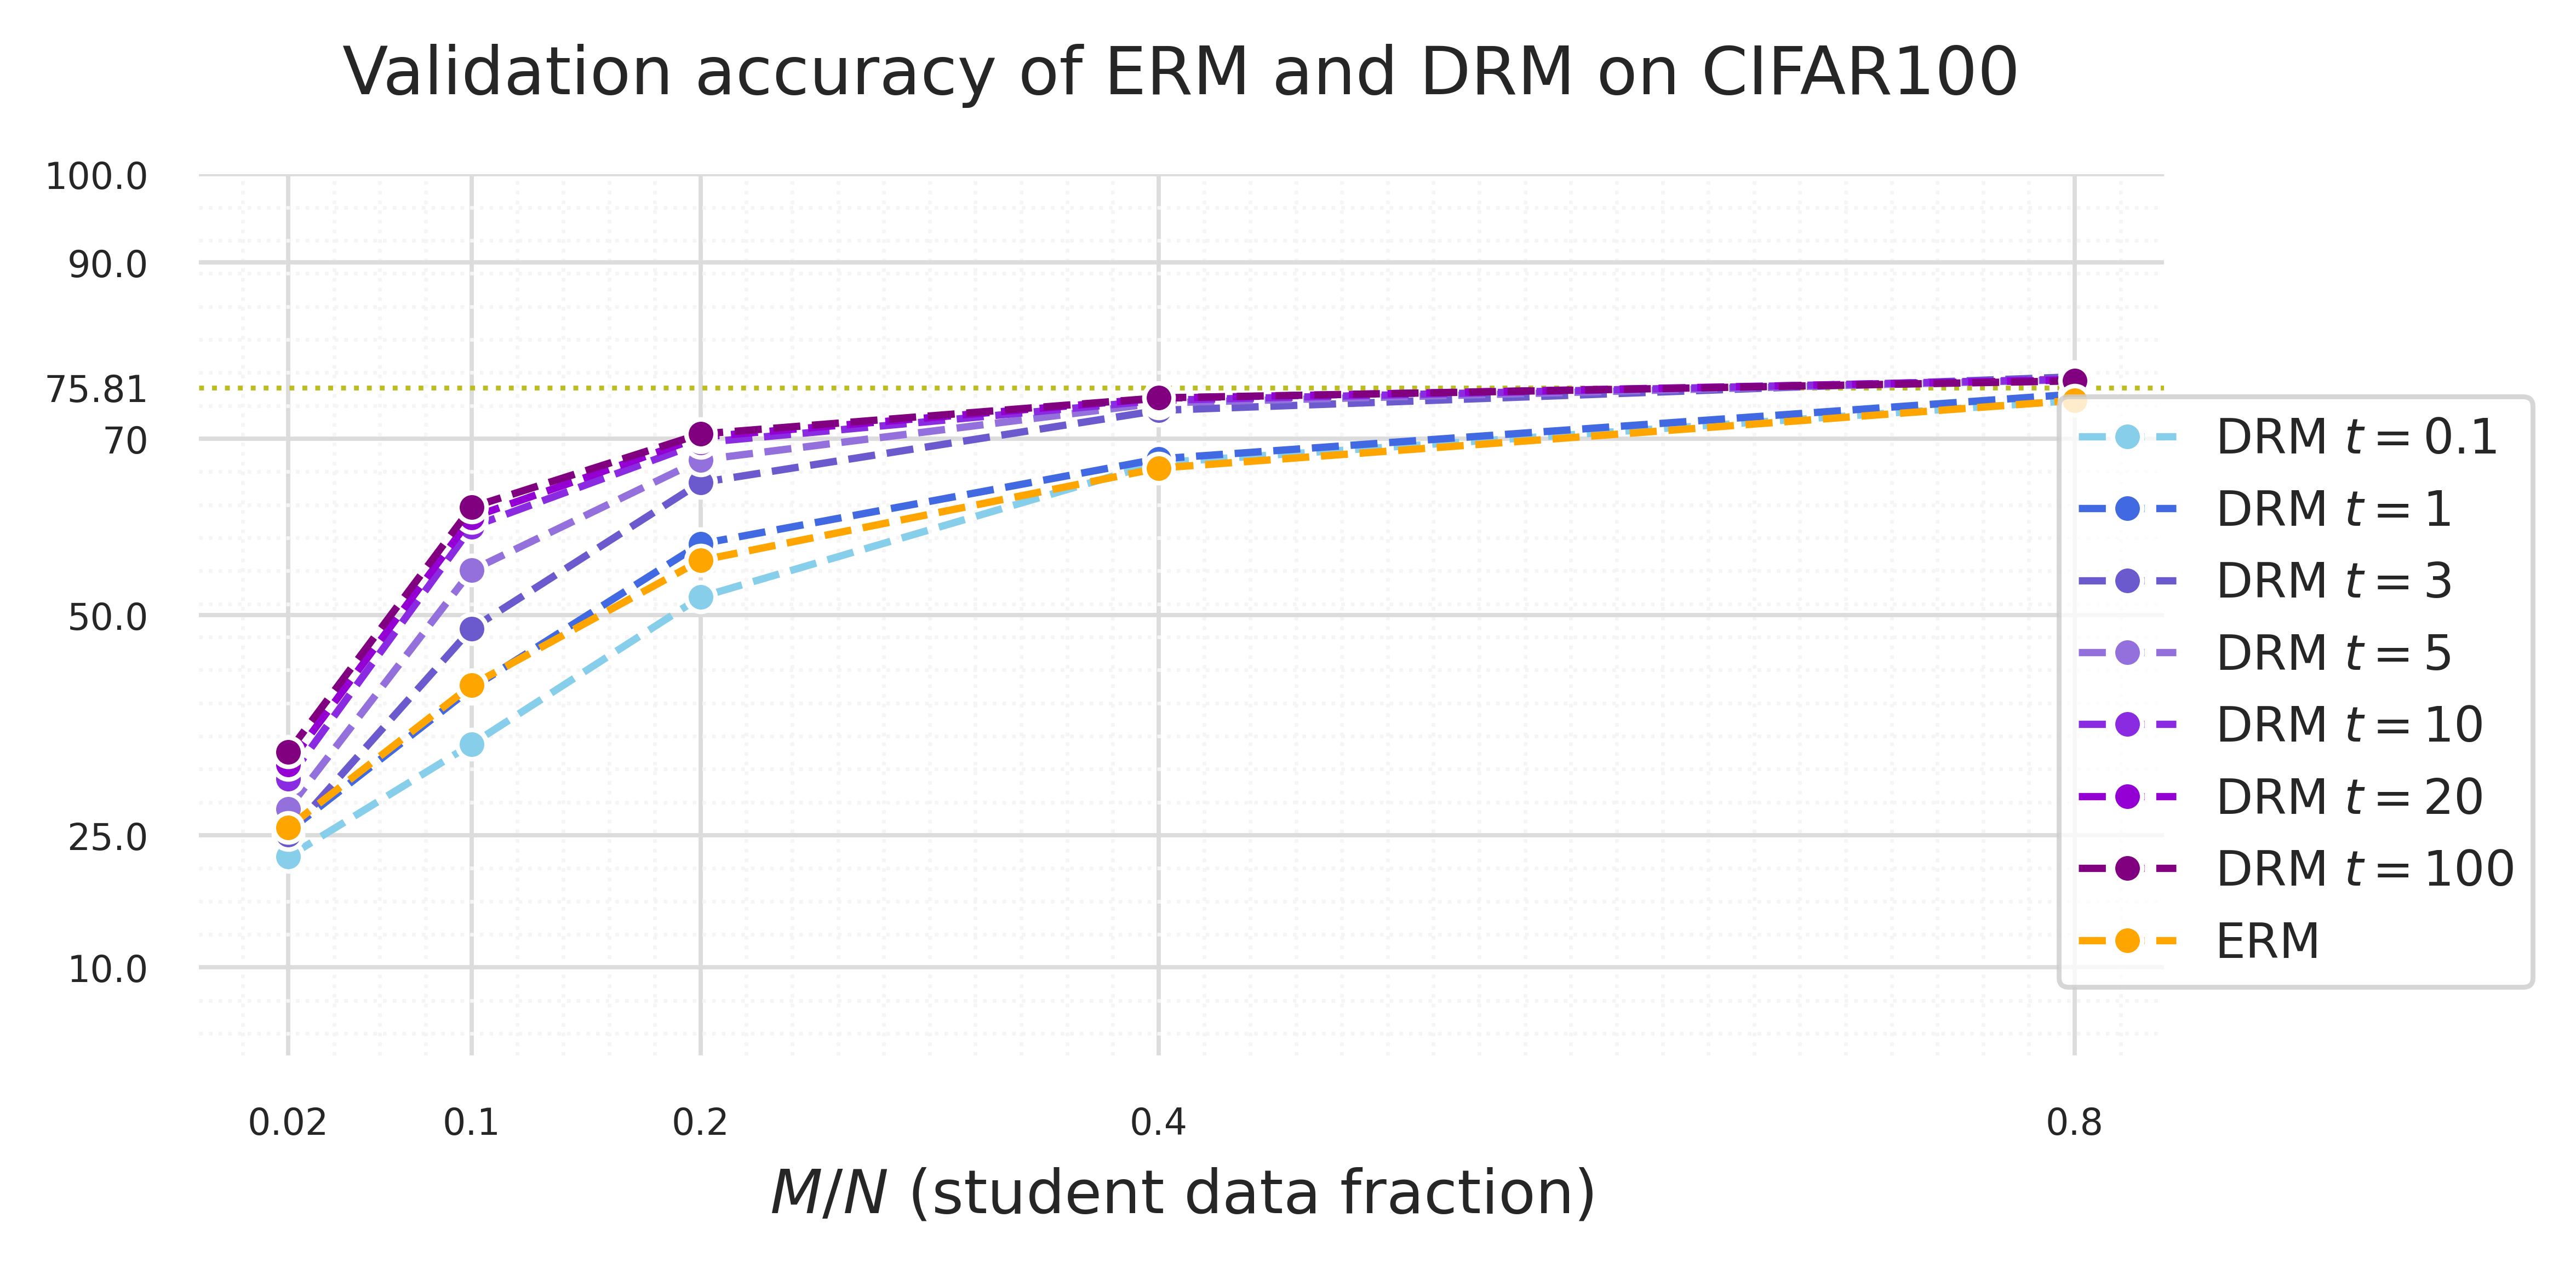

In [44]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(6,3), sharey=True, dpi=800)
    colors = ['royalblue','orange','purple', 'mediumorchid','mediumpurple', 'slateblue']
    colors = ['orange','royalblue','skyblue','slateblue','mediumpurple','blueviolet','darkviolet', 'purple','mediumvioletred','indigo']

    cmap = plt.get_cmap('twilight', len(temperatures)+4)
    color_list = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)][3:]

    _df0 = working_df.loc[working_df['alpha']==0.0]

    _df = _df0.loc[_df0['temperature']==0.1]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[2], ls='--',ax=ax, label="distil.val")
    

    _df = _df0.loc[_df0['temperature']==1.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='--',ax=ax, label="distil.val")
    

    _df = _df0.loc[_df0['temperature']==3.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[3], ls='--',ax=ax, label="distil.val")
    

    _df = _df0.loc[_df0['temperature']==5.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[4], ls='--',ax=ax, label="distil.val")
    

    _df = _df0.loc[_df0['temperature']==10.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[5], ls='--',ax=ax, label="distil.val")
    

    _df = _df0.loc[_df0['temperature']==20.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[6], ls='--',ax=ax, label="distil.val")


    _df = _df0.loc[_df0['temperature']==100.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[7], ls='--',ax=ax, label="distil.val")
    
    # _df = _df0.loc[_df0['temperature']==1].loc[_df0['MSE']==True]
    # sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
    #              markers=True, marker='o', color=colors[8], ls='--',ax=ax, label="distil.val")
    
    
    # #_df = working_df_2
    _df1 = working_df.loc[working_df['alpha']==1.0]

    sns.lineplot(data=_df1, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls='--', ax=ax, label="labels.val")
    

    # ax.axvline(100.0, ls='--', color='tab:green')
    #ax.axhline(teacher_val_accuracy_rec, ls=':', color="tab:gray")
    # ax.axhline(teacher_train_accuracy, ls='-', color=colors[2], label="b")
    # # props = dict(boxstyle='square', facecolor='white', alpha=0.5)
    # ax.text(0.01, 0.9, 'teacher.val', transform=ax.transAxes, 
    #            fontsize=10, verticalalignment='top', bbox=props)
    #ax.set_yscale('log')
    #ax.set_xscale('symlog',linthresh=10e-2)
    #ax.set_xlim([0.02,1.])
    ax.set_ylim([0.0,100.0])

    ax.tick_params(axis='both',  labelsize=9)
    ax.set_xticks(buffer_sizes_p)
    #ax.set_xticklabels(['']+[ f'{l}' for l in buffer_sizes_p[0:]], fontsize=6)
    ax.set_xticklabels(buffer_sizes_p, fontsize=6)
    ax.tick_params(axis='x',  rotation=0)

    yticks = [10.0, 25., 50., 70, teacher_val_accuracy, 90., 100.0]
    plt.yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=6)

    #ax.axvline(x=1.0, color='mediumslateblue', linewidth=1.0, linestyle=':')

    # #ax.text(10.0,0, "Local", color="white", bbox={'facecolor': 'tab:green', 'alpha': 0.5, 'pad': 10})
    # ax.set_ylim(-1,10000.0)


    ax.set_title(f"Validation accuracy of ERM and DRM on CIFAR100", fontsize=11, y=1.05)
    ax.set_ylabel(r'', fontsize=11, x=-0.2)
    ax.set_xlabel(r'$M/N$ (student data fraction)', fontsize=10, y=+1)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, [r'DRM $t=0.1$',
                  r'DRM $t=1$',
                  r'DRM $t=3$',
                  r'DRM $t=5$',
                  r'DRM $t=10$',
                  r'DRM $t=20$',
                  r'DRM $t=100$',
                  #r'DRM - MSE',
                  r'ERM'], 
                title="", ncol=1, loc="lower right",bbox_to_anchor=(1.2, 0.05), fontsize=8)


    # AESTHETICS control 
    ax.set_facecolor('white')
    [ax.spines[side].set_visible(False) for side in ax.spines]
    # major and minor grids
    ax.grid(which='major', color='gainsboro', linewidth=0.7)
    ax.grid(which='minor', color='whitesmoke', linestyle=':', linewidth=0.6)
    # Make the minor ticks and gridlines show.
    ax.minorticks_on()
    #ax.tick_params(which='minor', bottom=False, left=False)
    #fig.supxlabel(r' % of dataset used', fontsize=12, y=-0.1)

    a = ax.get_ygridlines()
    b = a[4]
    b.set_color('tab:olive')
    b.set_linewidth(0.8)
    b.set_linestyle(':')
    #sns.despine()
    plt.tight_layout()

/tmp/ipykernel_741652/994060833.py:13: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", label="", style="alpha",


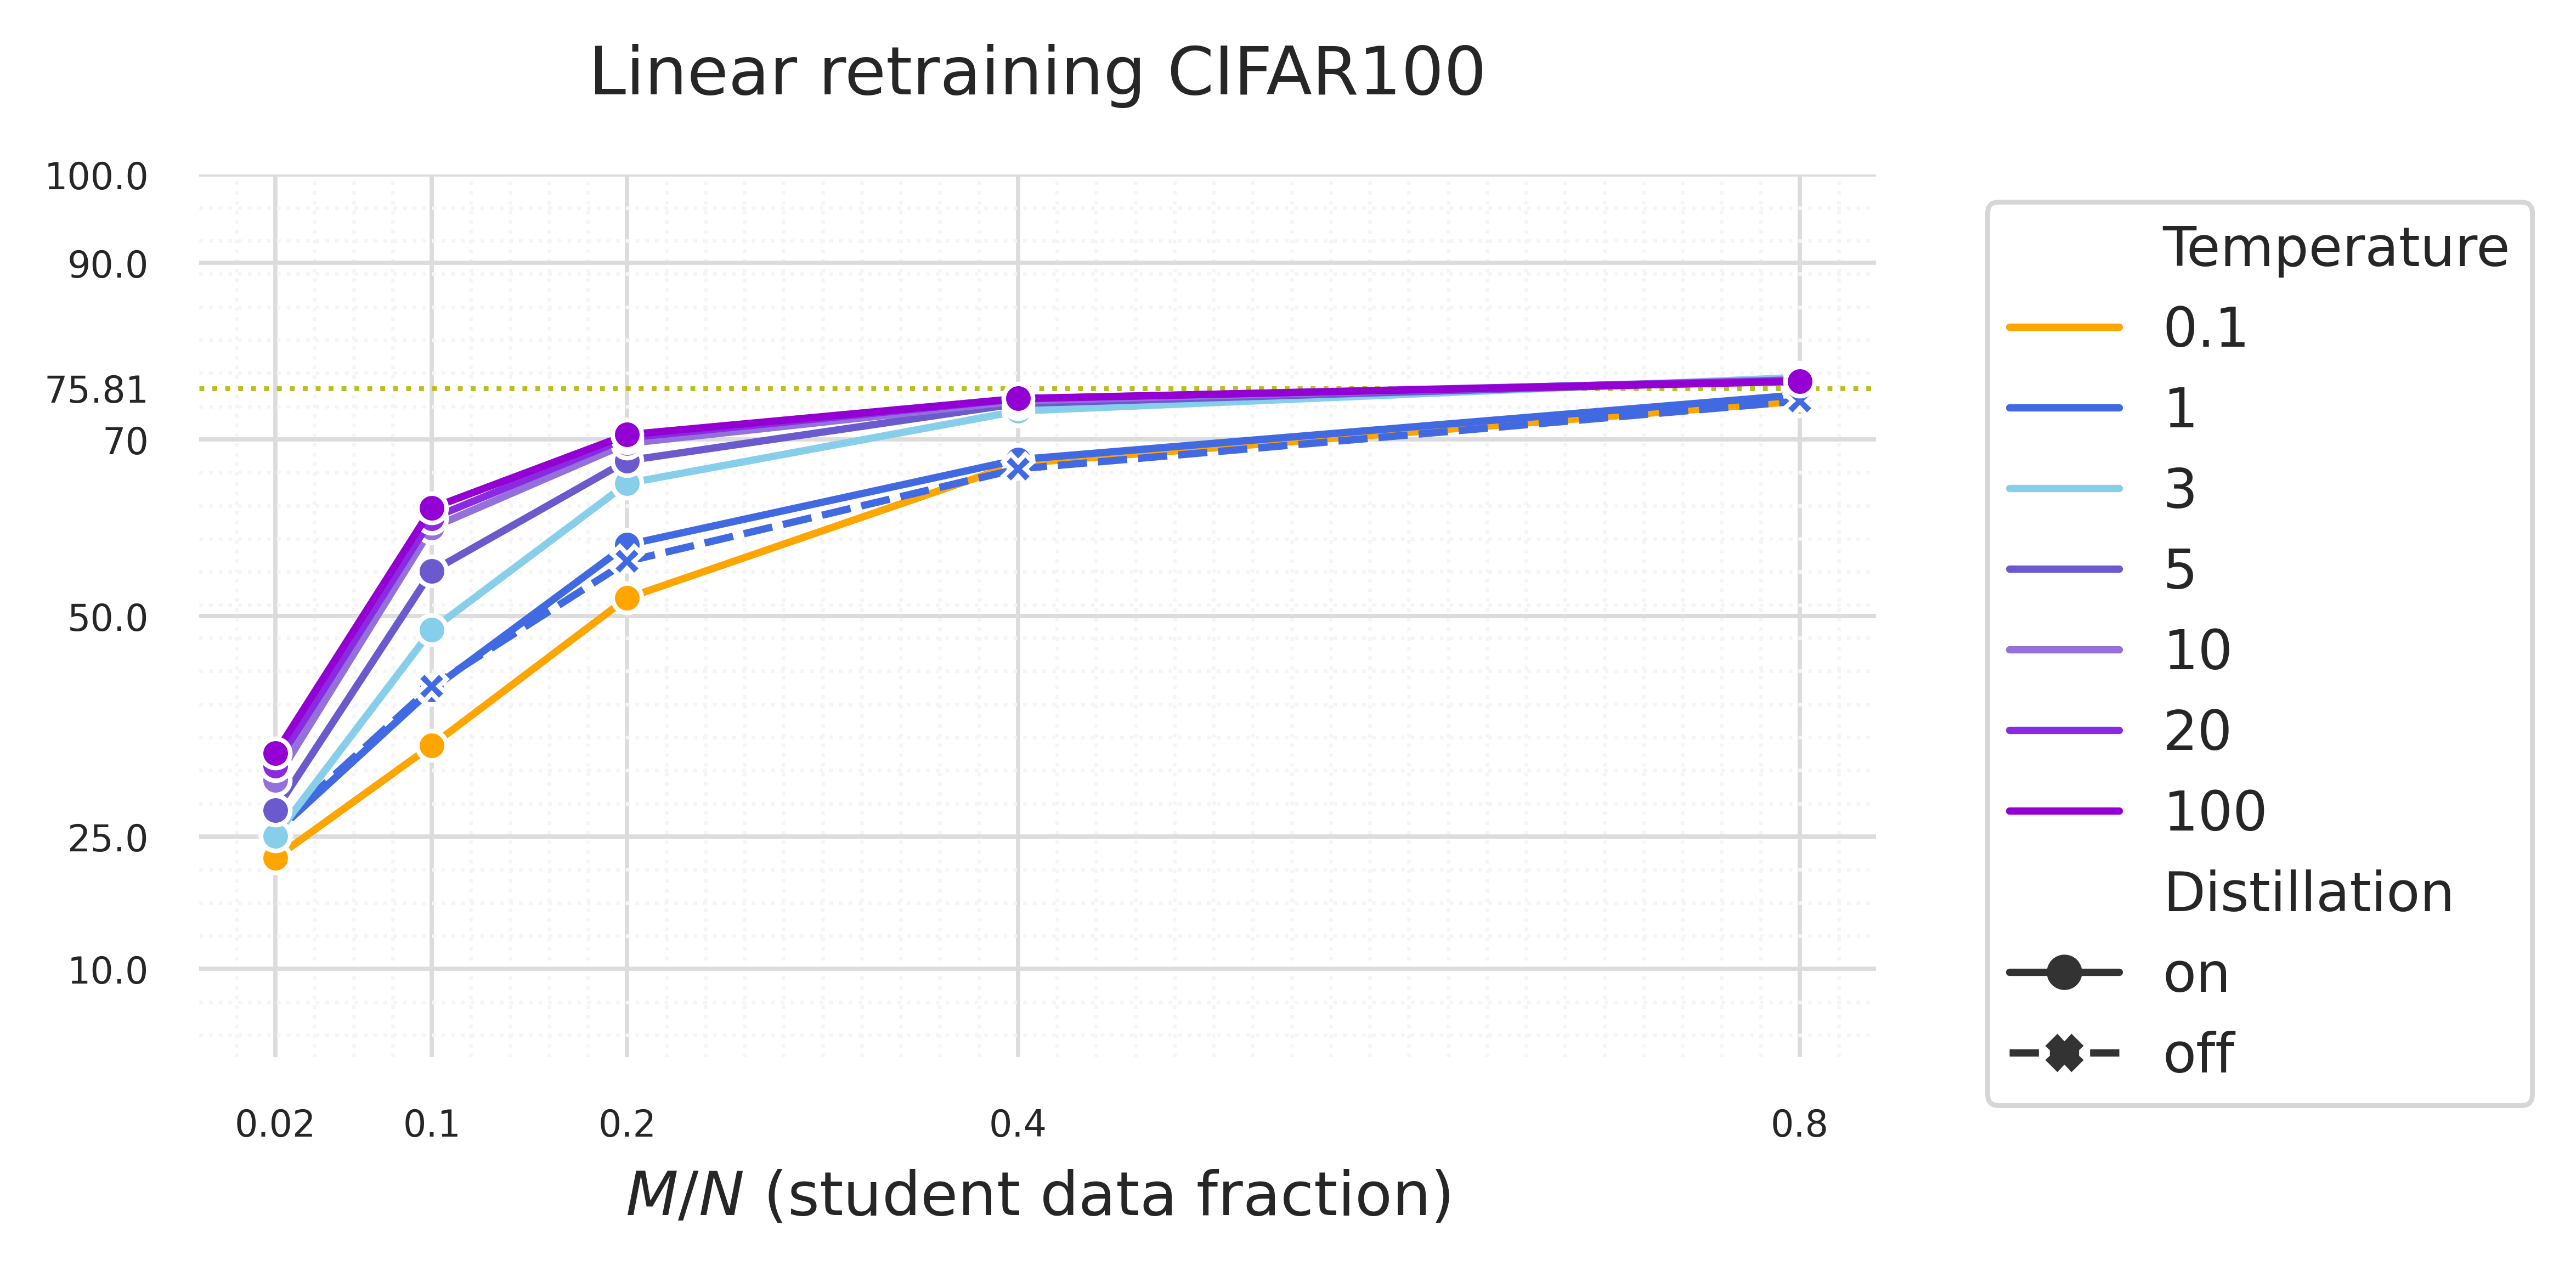

In [43]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(6,3), sharey=True, dpi=800)
    colors = ['royalblue','orange','purple', 'mediumorchid','mediumpurple', 'slateblue']
    colors = ['orange','royalblue','skyblue','slateblue','mediumpurple','blueviolet','darkviolet', 'purple','mediumvioletred','indigo']

    cmap = plt.get_cmap('twilight', len(temperatures)+4)
    color_list = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)][3:]


    _df0 = working_df
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", label="", style="alpha",
                markers=True, hue="T",ax=ax, palette=colors, err_style='band')


    # ax.tick_params(axis='both',  labelsize=6)
    # xticks  = [1.0,  1.2,  1.4,  1.6,  1.8, 2.0]
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks, fontsize=6)
    # ax.tick_params(axis='x',  rotation=0)

    ax.set_ylabel(r'Student-Teacher kernel alignment', fontsize=8, x=-0.2)
    ax.set_xlabel(r'Gain factor', fontsize=8, y=10)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ["Data", 1200, 6000, 12000, 24000, 48000, "Temperature", 1, 3, 5, 10, 20, 100, "Distillation", "on", "off"], 
                title="", ncol=1, 
                bbox_to_anchor=(1.05, 1.0), fontsize=5)
    
    ax.set_ylim([0.0,100.0])

    ax.tick_params(axis='both',  labelsize=9)
    ax.set_xticks(buffer_sizes_p)
    #ax.set_xticklabels(['']+[ f'{l}' for l in buffer_sizes_p[0:]], fontsize=6)
    ax.set_xticklabels(buffer_sizes_p, fontsize=6)
    ax.tick_params(axis='x',  rotation=0)

    yticks = [10.0, 25., 50., 70, teacher_val_accuracy, 90., 100.0]
    plt.yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=6)

    #ax.axvline(x=1.0, color='mediumslateblue', linewidth=1.0, linestyle=':')

    # #ax.text(10.0,0, "Local", color="white", bbox={'facecolor': 'tab:green', 'alpha': 0.5, 'pad': 10})
    # ax.set_ylim(-1,10000.0)


    ax.set_title(f"Linear retraining CIFAR100", fontsize=11, y=1.05)
    ax.set_ylabel(r'', fontsize=11, x=-0.2)
    ax.set_xlabel(r'$M/N$ (student data fraction)', fontsize=10, y=+1)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ["Temperature", 0.1, 1, 3, 5, 10, 20, 100, "Distillation", "on", "off"], 
                title="", ncol=1, 
                bbox_to_anchor=(1.05, 1.0), fontsize=9)


    # AESTHETICS control 
    ax.set_facecolor('white')
    [ax.spines[side].set_visible(False) for side in ax.spines]
    # major and minor grids
    ax.grid(which='major', color='gainsboro', linewidth=0.7)
    ax.grid(which='minor', color='whitesmoke', linestyle=':', linewidth=0.6)
    # Make the minor ticks and gridlines show.
    ax.minorticks_on()
    #ax.tick_params(which='minor', bottom=False, left=False)
    #fig.supxlabel(r' % of dataset used', fontsize=12, y=-0.1)

    a = ax.get_ygridlines()
    b = a[4]
    b.set_color('tab:olive')
    b.set_linewidth(0.8)
    b.set_linestyle(':')
    #sns.despine()
    plt.tight_layout()

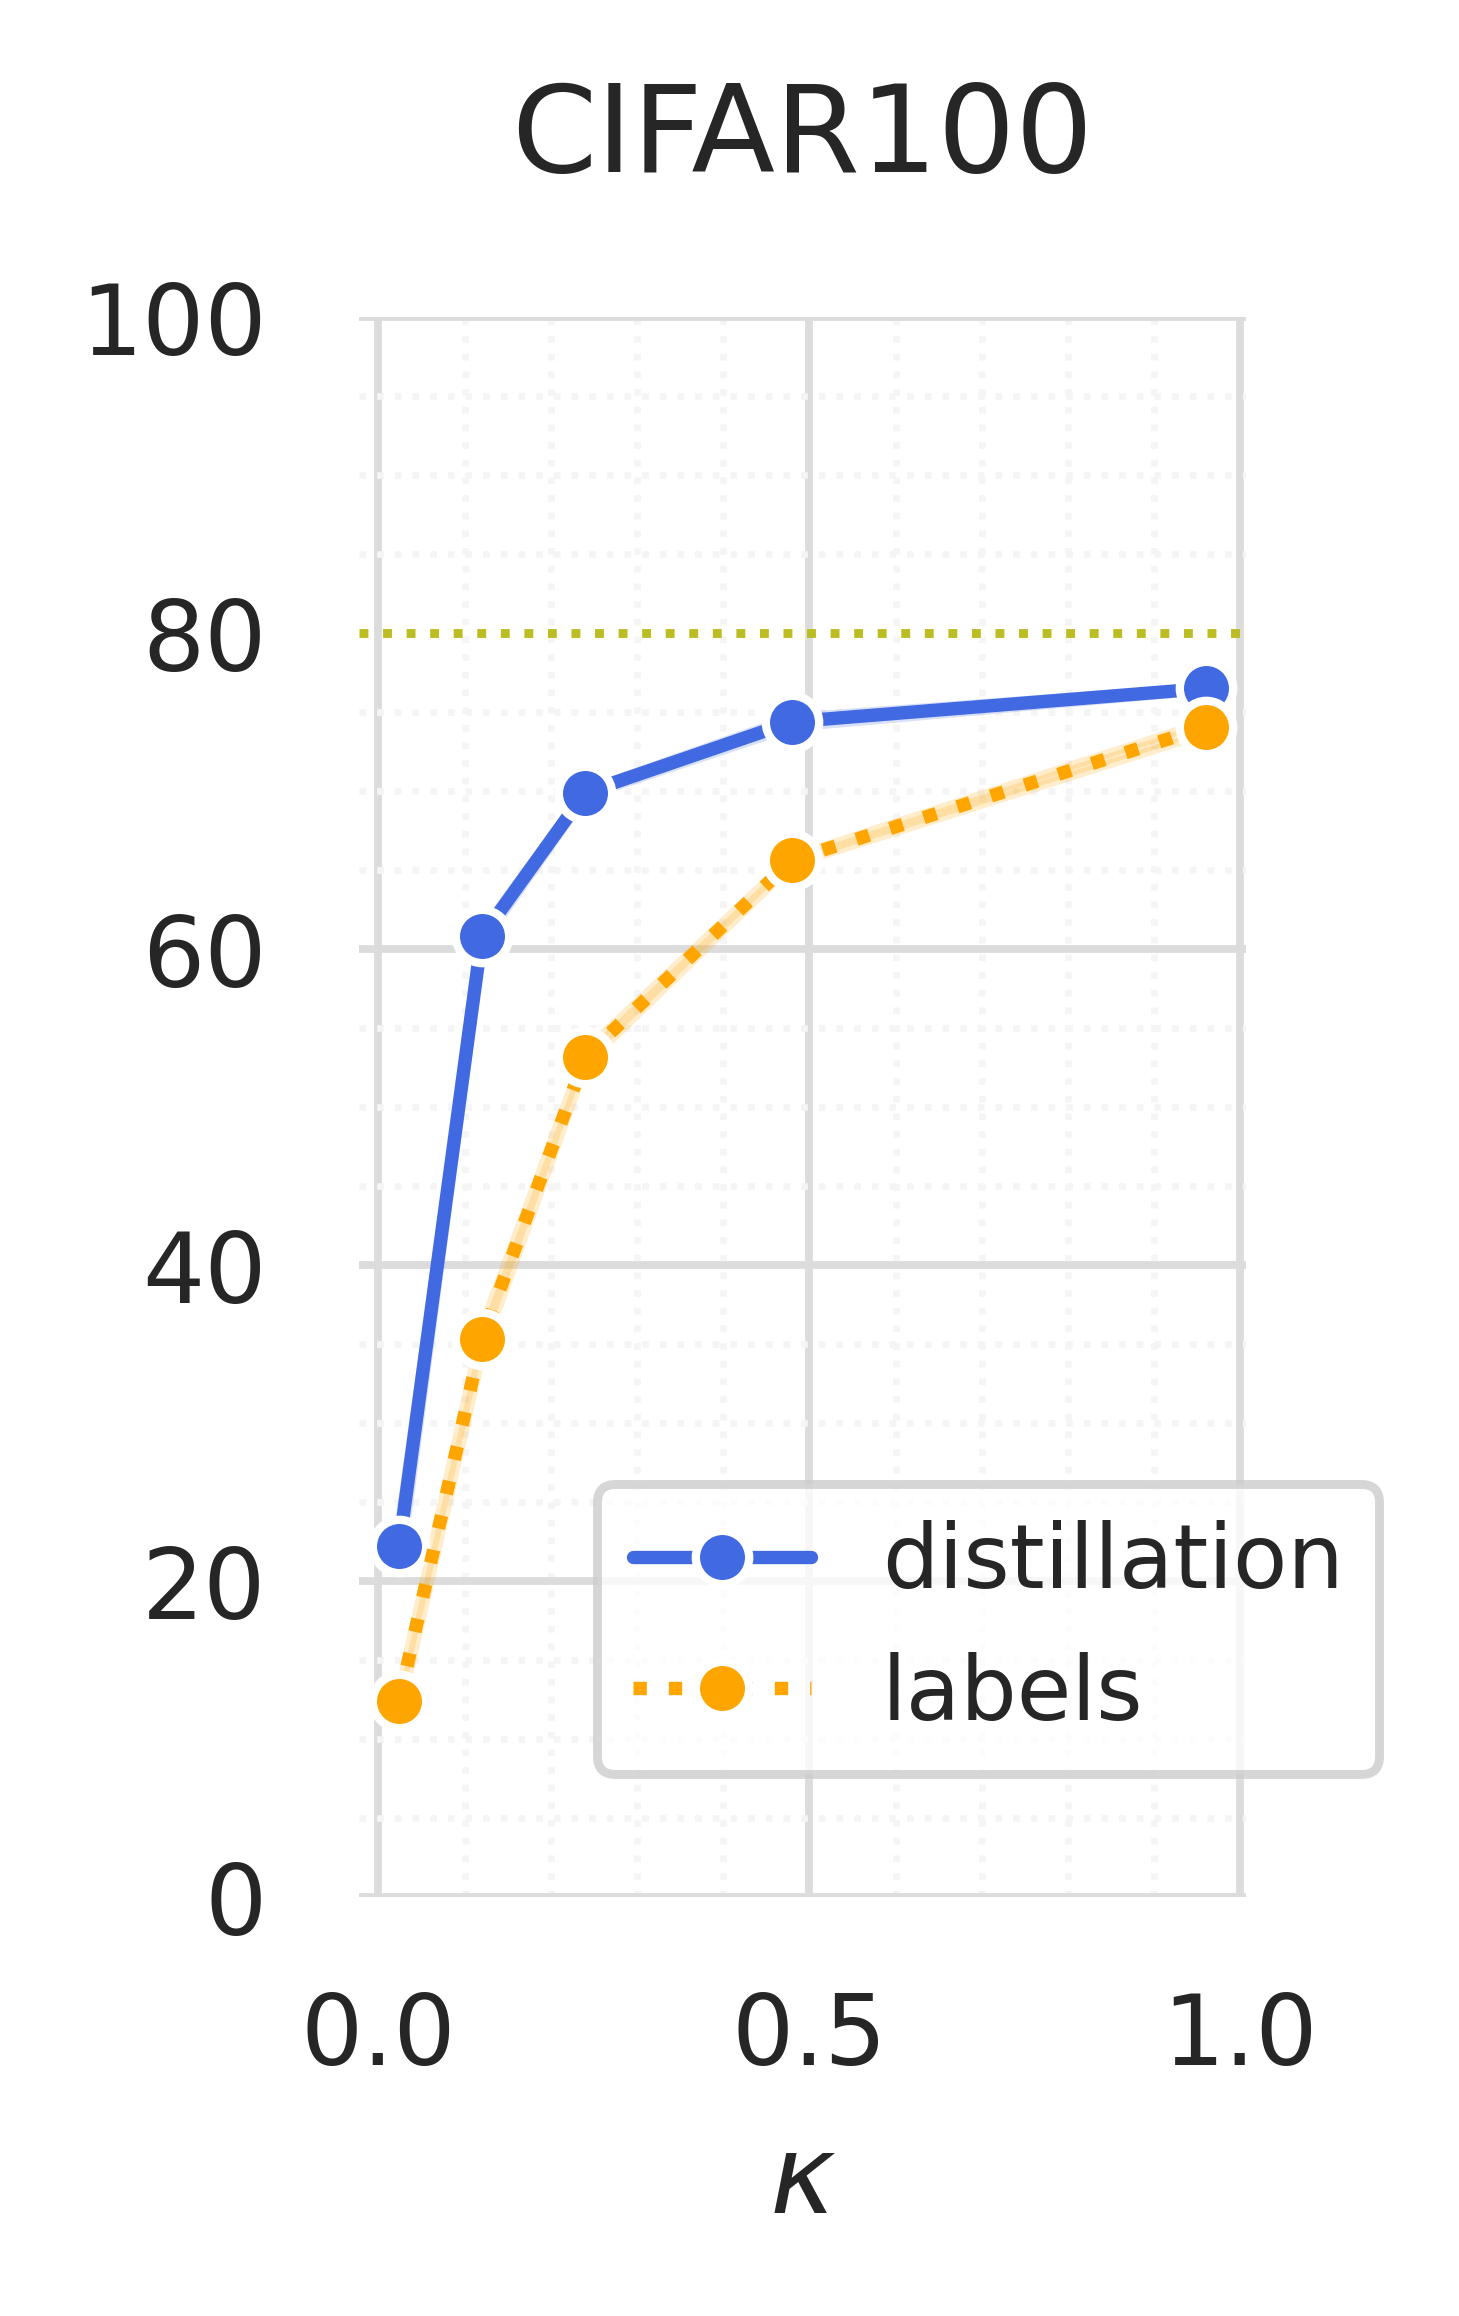

In [37]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(2,3), sharey=True, dpi=800)
    colors = ['orange','royalblue','skyblue','slateblue','mediumpurple','blueviolet','darkviolet', 'purple','mediumvioletred','indigo']

    cmap = plt.get_cmap('twilight', len(temperatures)+4)
    color_list = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)][3:]

    _df0 = working_df.loc[working_df['alpha']==0.0]


    _df = _df0.loc[_df0['temperature']==100.0]
    sns.lineplot(data=_df, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax, label="distil.val")
    
    _df1 = working_df.loc[working_df['alpha']==1.0]

    sns.lineplot(data=_df1, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax, label="labels.val")
    

    # ax.axvline(100.0, ls='--', color='tab:green')
    #ax.axhline(teacher_val_accuracy_rec, ls=':', color="tab:gray")
    # ax.axhline(teacher_train_accuracy, ls='-', color=colors[2], label="b")
    # # props = dict(boxstyle='square', facecolor='white', alpha=0.5)
    # ax.text(0.01, 0.9, 'teacher.val', transform=ax.transAxes, 
    #            fontsize=10, verticalalignment='top', bbox=props)
    #ax.set_yscale('log')
    #ax.set_xscale('symlog',linthresh=10e-2)
    #ax.set_xlim([0.02,1.])
    ax.set_ylim([0.0,100.0])

    #ax.tick_params(axis='both',  labelsize=9)
    #ax.set_xticks(buffer_sizes_p)
    #ax.set_xticklabels(['']+[ f'{l}' for l in buffer_sizes_p[0:]], fontsize=6)
    #ax.set_xticklabels(buffer_sizes_p, fontsize=6)
    #ax.tick_params(axis='x',  rotation=0)

    #yticks = [10.0, 25., 50., 70, teacher_val_accuracy, 90., 100.0]
    #plt.yticks(yticks)
    #ax.set_yticklabels(yticks, fontsize=6)

    #ax.axvline(x=1.0, color='mediumslateblue', linewidth=1.0, linestyle=':')

    # #ax.text(10.0,0, "Local", color="white", bbox={'facecolor': 'tab:green', 'alpha': 0.5, 'pad': 10})
    # ax.set_ylim(-1,10000.0)


    ax.set_title(f"CIFAR100", fontsize=11, y=1.05)
    ax.set_ylabel(r'', fontsize=11, x=-0.2)
    ax.set_xlabel(r'$\kappa$', fontsize=10, y=+1)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ['distillation','labels'], 
                title="", ncol=1, loc="lower right",bbox_to_anchor=(1.2, 0.05), fontsize=8)


    # AESTHETICS control 
    ax.set_facecolor('white')
    [ax.spines[side].set_visible(False) for side in ax.spines]
    # major and minor grids
    ax.grid(which='major', color='gainsboro', linewidth=0.7)
    ax.grid(which='minor', color='whitesmoke', linestyle=':', linewidth=0.6)
    # Make the minor ticks and gridlines show.
    ax.minorticks_on()
    #ax.tick_params(which='minor', bottom=False, left=False)
    #fig.supxlabel(r' % of dataset used', fontsize=12, y=-0.1)

    a = ax.get_ygridlines()
    b = a[4]
    b.set_color('tab:olive')
    b.set_linewidth(0.8)
    b.set_linestyle(':')
    #sns.despine()
    plt.tight_layout()